# March 28, 2022

## numpy and broadcasting

Broadcasting is a feature of numpy that let's us combine arrays of different sizes.

In [2]:
import numpy as np

In [3]:
a = np.array([1,2,3])
b = np.array([4,6,7])

In [4]:
a + b

array([ 5,  8, 10])

In [6]:
print(a)
print(a + 1)

[1 2 3]
[2 3 4]


In [7]:
A = np.arange(16).reshape(4,4)
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [8]:
print(A[:2,2:])

[[2 3]
 [6 7]]


In [9]:
A[:2,2:] = 99

print(A)

[[ 0  1 99 99]
 [ 4  5 99 99]
 [ 8  9 10 11]
 [12 13 14 15]]


In [10]:
c = np.array([8,9])

print(a)
print(c)
print(a + c)

[1 2 3]
[8 9]


ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [11]:
d = np.array([10])

print(a)
print(d)
print(a + d)

[1 2 3]
[10]
[11 12 13]


Broadcasting can seem complicated when first exposed, but there are some simple rules for when broadcasting.

In [16]:
A = np.arange(20).reshape(5,4)
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [17]:
print(A.shape)

(5, 4)


In [18]:
e = np.array([1,2,3,4])
print(e)
print(e.shape)

[1 2 3 4]
(4,)


In [19]:
A + e

array([[ 1,  3,  5,  7],
       [ 5,  7,  9, 11],
       [ 9, 11, 13, 15],
       [13, 15, 17, 19],
       [17, 19, 21, 23]])

In the above operation `A + e`, the array `A` has shape (5,4) while `e` has shape (4,). The last dimensions of both arrays have the same length, which means their compatible.

In [20]:
A * e

array([[ 0,  2,  6, 12],
       [ 4, 10, 18, 28],
       [ 8, 18, 30, 44],
       [12, 26, 42, 60],
       [16, 34, 54, 76]])

## Example

In [21]:
import matplotlib.pyplot as plt

In [22]:
a = np.zeros((10,10,3))

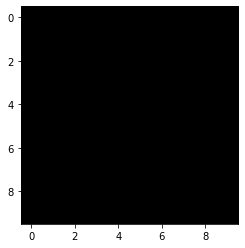

In [23]:
plt.imshow(a)
plt.show()

In [24]:
a[2:4,:,:].shape

(2, 10, 3)

In [25]:
r = np.array([1,0,0])

In [26]:
a[2:4,:,:] = r

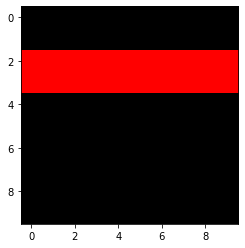

In [27]:
plt.imshow(a)
plt.show()

In [28]:
colors = np.random.rand(10,3)

In [29]:
a.shape

(10, 10, 3)

In [30]:
colors.shape

(10, 3)

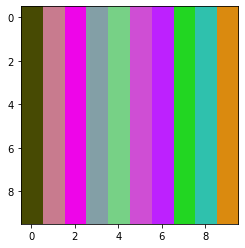

In [31]:
a = np.zeros((10,10,3))

a = a + colors

plt.imshow(a)
plt.show()

In [32]:
colors[0]

array([0.28219795, 0.29387922, 0.01199081])

What if we want to use this broadcasting to create rows instead?

In [33]:
a = np.zeros((10,10,3))

colors = np.random.rand(10,3)

colors = colors.reshape((10,1,3))

In [34]:
print(a.shape)
print(colors.shape)

(10, 10, 3)
(10, 1, 3)


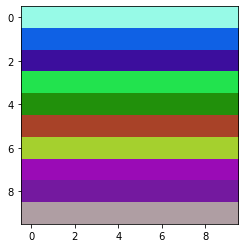

In [35]:
a = a + colors

plt.imshow(a)
plt.show()

## Boolean numpy arrays

A Boolean array is an array containing `True`/`False` values. We generate such arrays using logical operations on other numpy arrays.

In [53]:
a = np.arange(20,dtype=float).reshape(5,4)
print(a)

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]
 [16. 17. 18. 19.]]


In [54]:
(a % 2) == 0

array([[ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False]])

In [55]:
a > 5

array([[False, False, False, False],
       [False, False,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

We can use the logical operators `&` for `and`, `|` for `or`, and `~` for `not`:

In [56]:
mask = (~(a > 5)) & (a%2 == 0)
mask

array([[ True, False,  True, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

We've seen how to access individual elements of an array, and how access slices:

In [57]:
print(a[0,1])

print(a[1:4,:2])

1.0
[[ 4.  5.]
 [ 8.  9.]
 [12. 13.]]


We can use these boolean arrays to access portions of an array of the same shape.

In [58]:
a[mask]

array([0., 2., 4.])

In [44]:
b = np.random.rand(5,4)

In [45]:
b[mask]

array([0.16676265, 0.719893  , 0.13321577])

In [59]:
a[mask] = b[mask]

In [60]:
print(a)

[[ 0.16676265  1.          0.719893    3.        ]
 [ 0.13321577  5.          6.          7.        ]
 [ 8.          9.         10.         11.        ]
 [12.         13.         14.         15.        ]
 [16.         17.         18.         19.        ]]


## Example (possibly helpful for tartans)

In [61]:
a = np.zeros((10,10,3))

mask = (np.random.rand(10,10) > .5)

In [64]:
a[mask] = np.array([0,1,0])

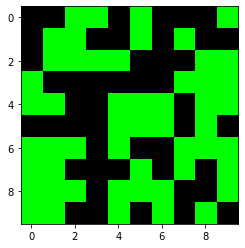

In [65]:
plt.imshow(a)
plt.show()

In [68]:
a = np.zeros((10,10,3))

mask = np.zeros((10,10),dtype=bool)
print(mask)

[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]


In [69]:
mask[:,6:8] = True

In [70]:
print(mask)

[[False False False False False False  True  True False False]
 [False False False False False False  True  True False False]
 [False False False False False False  True  True False False]
 [False False False False False False  True  True False False]
 [False False False False False False  True  True False False]
 [False False False False False False  True  True False False]
 [False False False False False False  True  True False False]
 [False False False False False False  True  True False False]
 [False False False False False False  True  True False False]
 [False False False False False False  True  True False False]]


In [71]:
a[mask] = np.array([0,0,1])

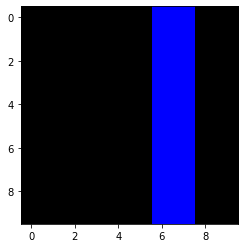

In [73]:
plt.imshow(a)
plt.show()

Accessing elements of numpy arrays using an array/list of indices:

In [77]:
a = np.arange(10) + 8
print(a)

[ 8  9 10 11 12 13 14 15 16 17]


In [78]:
a[5]

13

In [79]:
a[[1,2,5,7]]

array([ 9, 10, 13, 15])

In [82]:
a = np.zeros((50,50,3))

indices = np.arange(10,17)

In [83]:
a[indices] = np.array([1,0,0])

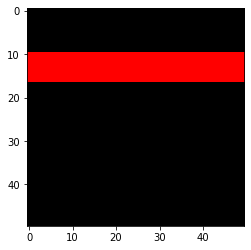

In [84]:
plt.imshow(a)
plt.show()

In [85]:
a[:,indices] = np.array([0,0,1])

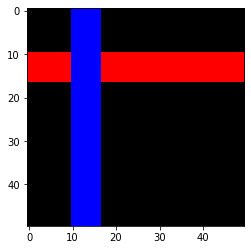

In [86]:
plt.imshow(a)
plt.show()

# imread()

The `imread()` function can be used read an image file and convert it into a numpy array.

In [87]:
porcupine = plt.imread('Crazy_eyes_the_porcupine.jpg')

In [90]:
print(porcupine)

[[[150 143 135]
  [142 135 127]
  [135 128 120]
  ...
  [117 122 102]
  [127 132 112]
  [135 140 118]]

 [[160 153 145]
  [154 147 139]
  [149 142 134]
  ...
  [106 109 102]
  [109 112 105]
  [111 114 105]]

 [[175 168 158]
  [174 167 157]
  [174 167 157]
  ...
  [ 60  63  68]
  [ 64  65  70]
  [ 64  65  69]]

 ...

 [[ 44  49  52]
  [ 48  52  55]
  [ 52  56  59]
  ...
  [ 15  19  28]
  [ 17  21  30]
  [ 17  21  30]]

 [[ 56  57  61]
  [ 52  53  57]
  [ 51  52  56]
  ...
  [ 11  18  26]
  [ 14  21  29]
  [ 17  24  32]]

 [[ 57  58  62]
  [ 52  53  57]
  [ 51  52  56]
  ...
  [ 11  18  26]
  [ 14  21  29]
  [ 18  25  33]]]


In [89]:
porcupine.shape

(1010, 1280, 3)

The `porcupine` array values are between `0` and `255`. We can rescale these to lie between `0` and `1` by dividing by `255`:

In [91]:
porcupine = porcupine / 255

In [92]:
print(porcupine)

[[[0.58823529 0.56078431 0.52941176]
  [0.55686275 0.52941176 0.49803922]
  [0.52941176 0.50196078 0.47058824]
  ...
  [0.45882353 0.47843137 0.4       ]
  [0.49803922 0.51764706 0.43921569]
  [0.52941176 0.54901961 0.4627451 ]]

 [[0.62745098 0.6        0.56862745]
  [0.60392157 0.57647059 0.54509804]
  [0.58431373 0.55686275 0.5254902 ]
  ...
  [0.41568627 0.42745098 0.4       ]
  [0.42745098 0.43921569 0.41176471]
  [0.43529412 0.44705882 0.41176471]]

 [[0.68627451 0.65882353 0.61960784]
  [0.68235294 0.65490196 0.61568627]
  [0.68235294 0.65490196 0.61568627]
  ...
  [0.23529412 0.24705882 0.26666667]
  [0.25098039 0.25490196 0.2745098 ]
  [0.25098039 0.25490196 0.27058824]]

 ...

 [[0.17254902 0.19215686 0.20392157]
  [0.18823529 0.20392157 0.21568627]
  [0.20392157 0.21960784 0.23137255]
  ...
  [0.05882353 0.0745098  0.10980392]
  [0.06666667 0.08235294 0.11764706]
  [0.06666667 0.08235294 0.11764706]]

 [[0.21960784 0.22352941 0.23921569]
  [0.20392157 0.20784314 0.22352941]


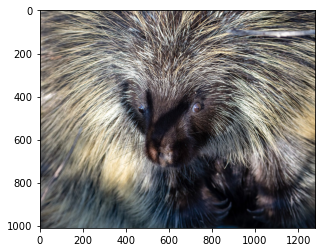

In [93]:
plt.imshow(porcupine)

In [96]:
crazy_eyes = porcupine[400:500,400:800]

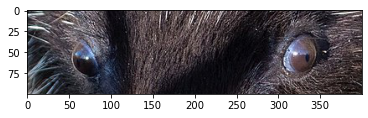

In [97]:
plt.imshow(crazy_eyes)
plt.show()

In [98]:
crazy_eyes[:,:,1] = 0 # remove all green
crazy_eyes[:,:,2] = 0 # remove all blue

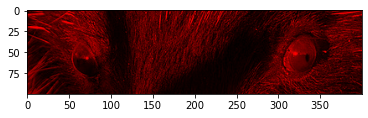

In [99]:
plt.imshow(crazy_eyes)
plt.show()

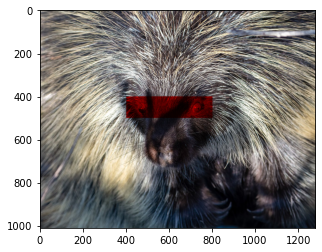

In [100]:
plt.imshow(porcupine)
plt.show()

# March 30, 2022

## Project 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
circuit = plt.imread('circuit.png')

In [9]:
print(circuit)

[[[0.12156863 0.12156863 0.12156863]
  [0.07450981 0.07450981 0.07450981]
  [0.10196079 0.10196079 0.10196079]
  ...
  [0.36078432 0.36078432 0.36078432]
  [0.34901962 0.34901962 0.34901962]
  [0.31764707 0.31764707 0.31764707]]

 [[0.12941177 0.12941177 0.12941177]
  [0.07450981 0.07450981 0.07450981]
  [0.0627451  0.0627451  0.0627451 ]
  ...
  [0.39215687 0.39215687 0.39215687]
  [0.34901962 0.34901962 0.34901962]
  [0.29411766 0.29411766 0.29411766]]

 [[0.15294118 0.15294118 0.15294118]
  [0.13333334 0.13333334 0.13333334]
  [0.08627451 0.08627451 0.08627451]
  ...
  [0.3137255  0.3137255  0.3137255 ]
  [0.2784314  0.2784314  0.2784314 ]
  [0.23921569 0.23921569 0.23921569]]

 ...

 [[0.01960784 0.01960784 0.01960784]
  [0.01960784 0.01960784 0.01960784]
  [0.01960784 0.01960784 0.01960784]
  ...
  [0.23137255 0.23137255 0.23137255]
  [0.2509804  0.2509804  0.2509804 ]
  [0.22745098 0.22745098 0.22745098]]

 [[0.03137255 0.03137255 0.03137255]
  [0.03137255 0.03137255 0.03137255]


In [7]:
print(circuit.shape)

(426, 640, 3)


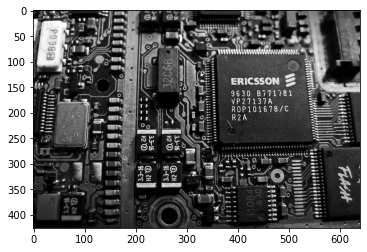

In [10]:
plt.imshow(circuit)
plt.show()

In [12]:
circuit[100,300]

array([0.63529414, 0.63529414, 0.63529414], dtype=float32)

In a grayscale image, the red, green, and blue channels all have the same value (for any given pixel). We can reduce ourselves to a 2D array by just taking one of these channels.

In [13]:
circuit = circuit[:,:,0]

In [14]:
print(circuit.shape)

(426, 640)


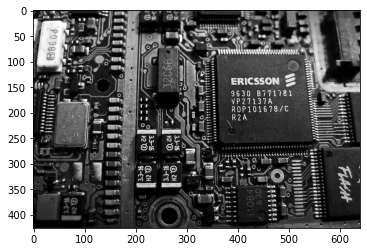

In [16]:
plt.imshow(circuit,cmap='gray')

## Adding noise to a 1D array

In [36]:
a = np.zeros(100)

For this example, I'd like to use `plt.imshow` to show a single row of pixels. However, `plt.imshow` expects a 2D array, while `a` is 1D. We can cheat by sticking `a` inside a list.

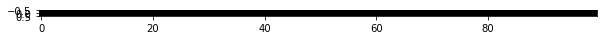

In [37]:
a_2D = a.reshape((1,len(a)))

plt.figure(figsize=(10,1))
plt.imshow(a_2D,cmap='gray')
plt.show()

We can use `np.random.rand` to generate some noise.

In [38]:
noise = np.random.rand(len(a))

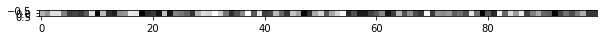

In [40]:
a = a + noise
a_2D = a.reshape((1,len(a)))

plt.figure(figsize=(10,1))
plt.imshow(a_2D,cmap='gray')
plt.show()

This noise is uniformly distributed between 0 and 1. For salt and pepper noise, we want all noise to either be full black or full white (0 or 1 only).

For the project, we want a certain percentage of the pixels to recieve salt and pepper noise. The `np.random.rand` command returns an array filled values with 0 and 1 taken from a uniformly random distribution with mean 0.5.

In probability theory, if $p(x)$ is a probability distribution, then the probability of an event $x$ lying between $a$ and $b$ is:

$$P(a \leq x \leq b) = \int_a^b p(x) dx$$

For us, this means that the probability that a random value in an array generated by `np.random.rand` is between `0` and `b` is `b` (the probability distribution associated to `np.random.rand` is $p(x)=1$).

If we want approximately 5% of the pixels to flip to white, we can generate generate a Boolean array with something like `np.random.rand(len(a)) < .05`:

In [41]:
mask = (np.random.rand(len(a)) < .05)

In [42]:
print(mask)

[False False False False False False False False False False False False
 False  True False False False False False False False False  True False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


We can check how many `True`s there are by summing the Boolean array:

In [43]:
mask.sum()

3

In [44]:
for i in range(10):
    mask = (np.random.rand(len(a)) < .05)   # Generate a Boolean array that 
                                            # should have about 5 trues
    print(mask.sum())                       # Print the actual number of True

3
5
6
6
8
5
1
3
2
4


Now let's use this mask to add some salt noise:

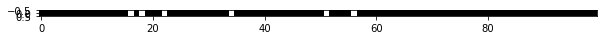

In [48]:
a = np.zeros(100)

noise = np.random.rand(len(a))
mask = noise < .05

a[mask] = 1                      # Change all pixels where mask is True 
                                 # to be white

    
a_2D = a.reshape((1,len(a)))

plt.figure(figsize=(10,1))
plt.imshow(a_2D,cmap='gray')
plt.show()

In [47]:
print(mask.sum())

4


In [51]:
np.random.rand(*a.shape)

array([0.62709321, 0.2928264 , 0.21426706, 0.93102597, 0.24200421,
       0.9123362 , 0.2025128 , 0.32218766, 0.38088992, 0.17925693,
       0.28826094, 0.90140144, 0.29799296, 0.77208925, 0.84578104,
       0.43627902, 0.0631924 , 0.91227516, 0.86134305, 0.23597865,
       0.3177078 , 0.76531146, 0.68356586, 0.20967118, 0.85012831,
       0.50168856, 0.14592342, 0.89793327, 0.67539295, 0.2807741 ,
       0.67433962, 0.03562983, 0.44065113, 0.71982987, 0.5016424 ,
       0.63760333, 0.46759427, 0.90341171, 0.34600283, 0.29446399,
       0.66655508, 0.02099333, 0.91954696, 0.94957694, 0.27373703,
       0.88256269, 0.08602188, 0.5812645 , 0.12714493, 0.2039748 ,
       0.84809299, 0.15099227, 0.09022092, 0.75694671, 0.99503492,
       0.7919464 , 0.82985505, 0.84191932, 0.59458264, 0.78186265,
       0.47095433, 0.95161489, 0.57878161, 0.96327336, 0.7683116 ,
       0.85428245, 0.40039617, 0.53896669, 0.95241138, 0.71450298,
       0.59446378, 0.35902292, 0.03073296, 0.54917516, 0.55699

## `np.mean()` and `np.median()`

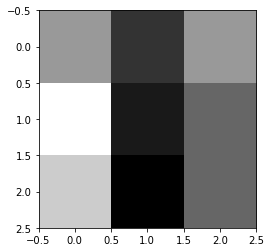

In [60]:
plt.imshow(circuit[2:5,6:9],cmap='gray')

In [58]:
np.mean(circuit[2:5,6:9])

0.06492375

In [56]:
np.median(circuit)

0.19215687

We can add a border to an image array by created a new array that is larger, then setting a slice of the new array equal to the original image array.

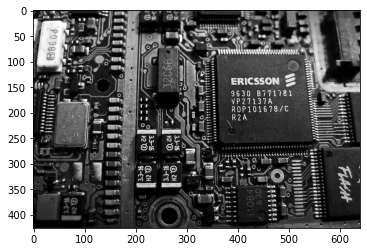

In [63]:
plt.imshow(circuit,cmap='gray')
plt.show()

In [64]:
print(circuit.shape)

(426, 640)


Let's add a 10 pixel border around the image. We'll need to include 20 additional rows (10 at the top, 10 at the bottom) and 20 additional columns (10 at the left, 10 at the right).

In [65]:
circuit_border = np.ones((circuit.shape[0] + 20, circuit.shape[1] + 20))

In [ ]:
noise = np.random.rand(circuit.shape[0], circuit.shape[1])

In [67]:
print(circuit_border.shape)

(446, 660)


Let's take a slice of `circuit_border` that has the same shape as `circuit` and is centered within `circuit_border` with a 10 pixel border on all sides.

In [68]:
circuit_border[10:-10,10:-10].shape

(426, 640)

In [69]:
circuit_border[10:-10,10:-10] = circuit

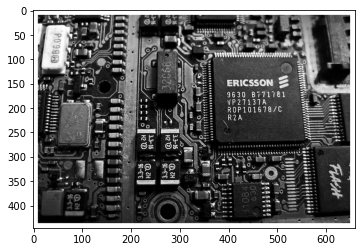

In [71]:
plt.imshow(circuit_border,cmap='gray')
plt.show()